In [1]:
### Notebook for plotting graphics from polygons

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPolygon
from bs4 import BeautifulSoup




In [2]:
#### Load data from kml file exported by Google Earth

file_path = ('data/kml/ballparks.kml')

with open(file_path) as file:

    xml_data = file.read()



# Initialize soup variables for parsing file
soup = BeautifulSoup(xml_data, 'xml')

folders = soup.Document.Folder
list = soup.Document.Folder.find_all('Folder')
# layers = soup.Document.Folder.Folder
# polygons = soup.Document.Folder.Placemark.Polygon

## Create a dataframe to hold the data parsed from xml
df = pd.DataFrame(columns=['field', 'foul', 'fop'])


## Loop through the folders and extract the data
i = 0   

for i in range(len(list)):

    folders = list[i]
    field_name = folders.find('name').text
    foul = folders.find_all('coordinates')[0].text
    fop = folders.find_all('coordinates')[1].text

    row = {
        'field': field_name,
        'foul': foul,
        'fop': fop
    }

    i+=1

    df = df.append(row, ignore_index=True)

## Cleaning
# remove new line and and space characters from coordinates
df = df.replace(r'\n','', regex=True) 
df = df.replace(r'\t','', regex=True) 

## Drop any duplicate rows
df = df.drop_duplicates(subset=['field'], keep='first')

## Drop any rows with empty fields
df = df[(df != 0).all(1)]

# ## remove any numberic characters and . from field names
# # There shouldn't be any anymore because of the validation I did before exporting kml
# df['field'] = df['field'].str.replace(r'\d+', '')

## Parse field names to get level column using regex
import re
re_mlb = re.compile(r'mlb', re.IGNORECASE)
re_pro = re.compile(r'pro', re.IGNORECASE)
re_college = re.compile(r'college', re.IGNORECASE)
re_youth = re.compile(r'youth', re.IGNORECASE)
re_muni = re.compile(r'muni', re.IGNORECASE)

df['level'] = df['field'].apply(lambda x: 'mlb' 
        if re_mlb.search(x) else 'pro' 
        if re_pro.search(x) else 'college' 
        if re_college.search(x) else 'youth' 
        if re_youth.search(x) else 'muni' 
        if re_muni.search(x) else 'high_school')

# clean up the field names
# remove the level from the field name
df['field'] = df['field'].str.replace(r'MLB', '')
df['field'] = df['field'].str.replace(r'pro', '')
df['field'] = df['field'].str.replace(r'college', '')
df['field'] = df['field'].str.replace(r'High School', 'HS')
# remove - from end of field name
df['field'] = df['field'].str.replace(r'- $', '')

## Output test csv
# df.to_csv('TEMP/level2_tost.csv', index=False)

df['foul_poly'] = df['foul'].apply(lambda x: {'type': 'Polygon', 'coordinates': [[tuple(map(float, coord.split(','))) for coord in x.split()]]})
df['fop_poly'] = df['fop'].apply(lambda x: {'type': 'Polygon', 'coordinates': [[tuple(map(float, coord.split(','))) for coord in x.split()]]})



C:\Users\Smitty\AppData\Local\Temp\ipykernel_19552\1836174812.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Smitty\AppData\Local\Temp\ipykernel_19552\1836174812.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Smitty\AppData\Local\Temp\ipykernel_19552\1836174812.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Smitty\AppData\Local\Temp\ipykernel_19552\1836174812.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(row, ignore_index=True)
C:\Users\Smitty\AppData\Loca

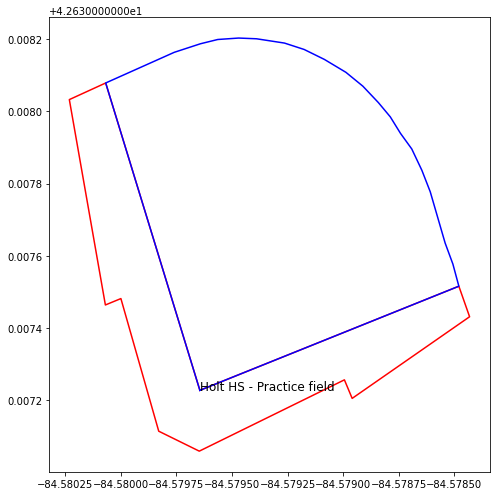

In [14]:
df.head()

i = 130

plt.rcParams["figure.figsize"] = [7.00, 7.00]
plt.rcParams["figure.autolayout"] = True
polygon1 = Polygon(df['foul_poly'][i]['coordinates'][0])
polygon2 = Polygon(df['fop_poly'][i]['coordinates'][0])

x2, y2 = polygon2.exterior.xy
x, y = polygon1.exterior.xy


## Add text to plot

plt.text(x[0], y[0], df['field'][i], fontsize=12)

plt.plot(x, y, c="red")
plt.plot(x2, y2, c="blue")
plt.show()